<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 2: Discrete-Time Systems<br/>
    <small>Date: January 24, 2023</small><br/>
    <small>Section: Tuesday 8:30 am<s/small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Justin Wang [100%]| |2 hours|

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**: *One-sided, with cover sheet, answers are in the same order as questions in the lab*||||
|**Ability to process given signals (20 pts)**: *Import signal, plot signal, filter signal*||||
|**Understanding and ability to implement difference equations (60 pts)**: *Draw system diagram, calculate impulse response, find inverse system answer ’discuss/explain’ questions*||||
|**Ability to test for linearity and time-invariance of systems (20 pts)**: *Supporting plots with clear indication of the proof*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3 style="color:red;"><left>Exercise 2</left></h3>

**1. Draw the block diagram of the discrete-time differentiator as in Figure 1.**

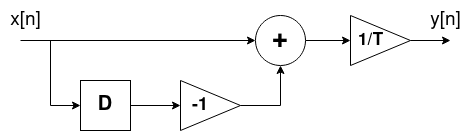

**2. Apply the discrete-time differentiator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<ipython-input-11-226ad8fd93b5>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,dy)


Text(0.5, 0, 'n')

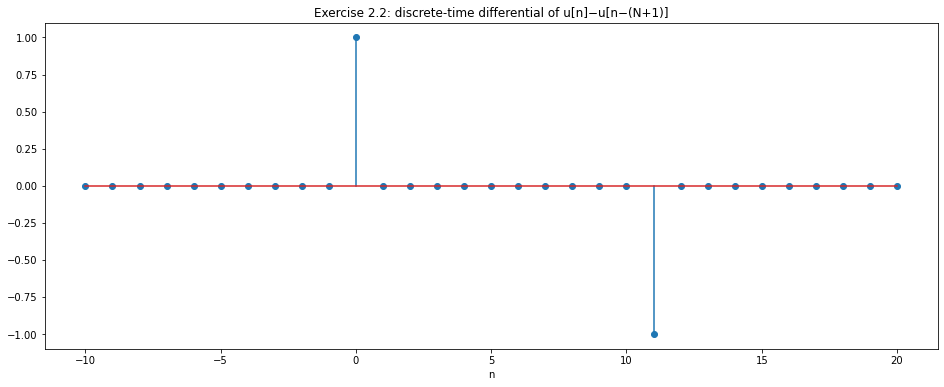

In [11]:
# write your code here
def f2_2(n, N):
  Y = (n >= 0).astype(float) - ((n-(N+1)) >= 0).astype(float)
  return Y

T = 1
n = np.arange(-10,20+T,T)
N = 10
dy = (f2_2(n,N) - f2_2(n-T,N))/T
plt.stem(n,dy)
plt.title("Exercise 2.2: discrete-time differential of u[n]−u[n−(N+1)]")
plt.xlabel("n")

**3. Draw the block diagram of the discrete-time integrator as in Figure 1.**

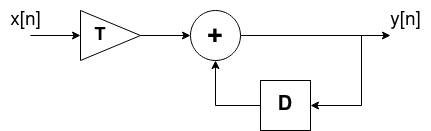

**4. Apply the discrete-time integrator to the signal $u[n]-u[n-(N+1)]$, with $N=10$, for $-10\leq n\leq20$, and plot the output. (This assumes a time step of $T=1$)**

<ipython-input-12-c2119f23f79d>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(n,y)


Text(0.5, 0, 'n')

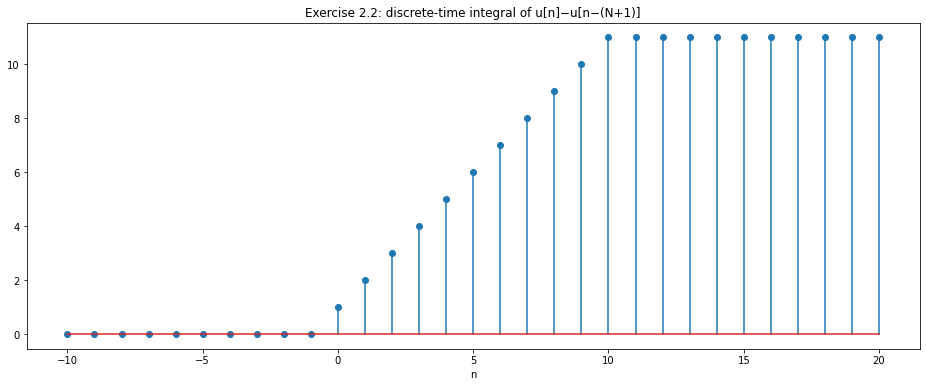

In [12]:
# write your code here

T = 1
n = np.arange(-10,20+T,T)
N = 10
y = np.arange(-10,20+T,T)
y[0] = T * f2_2(n[0], N)
for i in range(1, len(y)):
  y[i] = y[i-1] + T * f2_2(n[i], N)
plt.stem(n,y)
plt.title("Exercise 2.4: discrete-time integral of u[n]−u[n−(N+1)]")
plt.xlabel("n")

**5. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.1$.**

<ipython-input-14-f4554f89cd7b>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t,dx)


Text(0.5, 0, 't')

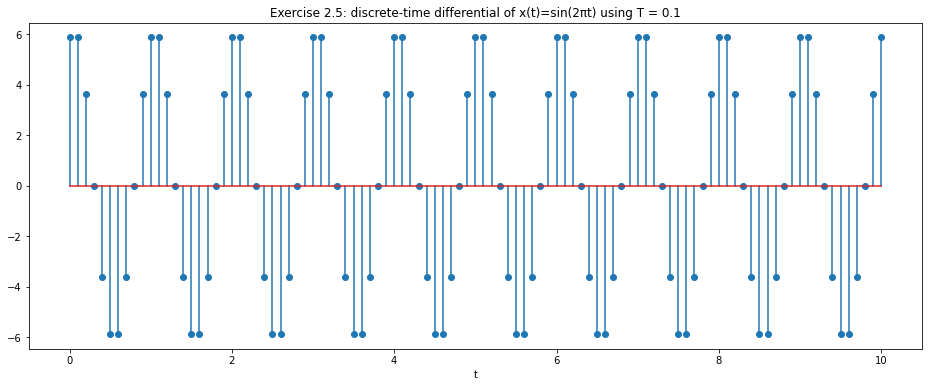

In [14]:
# write your code here

T = 0.1
t = np.arange(0,10+T,T)
dx = (np.sin(2*np.pi*t) - np.sin(2*np.pi*(t-T)))/T
plt.stem(t,dx)
plt.title("Exercise 2.5: discrete-time differential of x(t)=sin(2πt) using T = 0.1")
plt.xlabel("t")

**6. Use the discrete-time differentiator to numerically evaluate $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ for $t\in[0,10]$, try $T=0.001$.**

<ipython-input-15-43f2843c25f1>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t,dx)


Text(0.5, 0, 't')

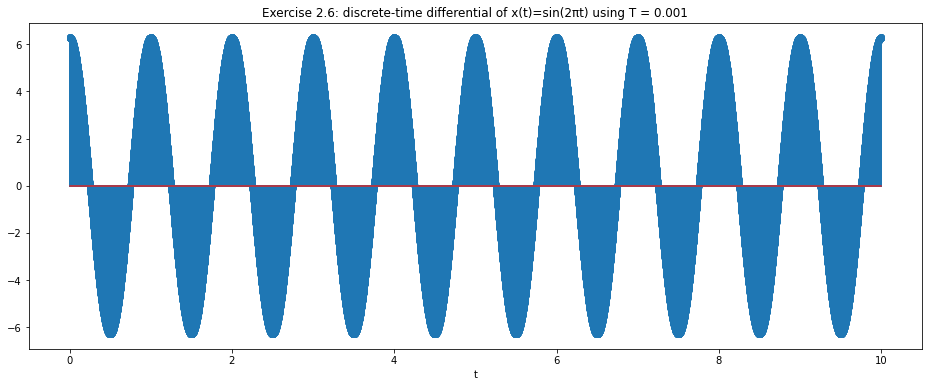

In [15]:
# write your code here
T = 0.001
t = np.arange(0,10+T,T)
dx = (np.sin(2*np.pi*t) - np.sin(2*np.pi*(t-T)))/T
plt.stem(t,dx)
plt.title("Exercise 2.6: discrete-time differential of x(t)=sin(2πt) using T = 0.001")
plt.xlabel("t")

**7. Compare the results in Q5 and Q6.**

The evaluation of $\frac{d}{dt}x(t)$ of $x(t)=\sin(2\pi t)$ is significantly better when using the smaller timestep of T = 0.001 in Q6.  The result in Q6 more closely resembles $x(t)=\cos(2\pi t)$.



<h3 style="color:red;"><left>Exercise 3</left></h3>

**1. For each of these five systems, do the following:**

* $S_1$
* $S_2$
* $S_1(S_2)$ (i.e., the series connection with $S_1$ following $S_2$)
* $S_2(S_1)$ (i.e., the series connection with $S_2$ following $S_1$)
* $S_1+S_2$

**i. Draw the system diagram (use only delays, multiplications, and additions as in Figure 1)**

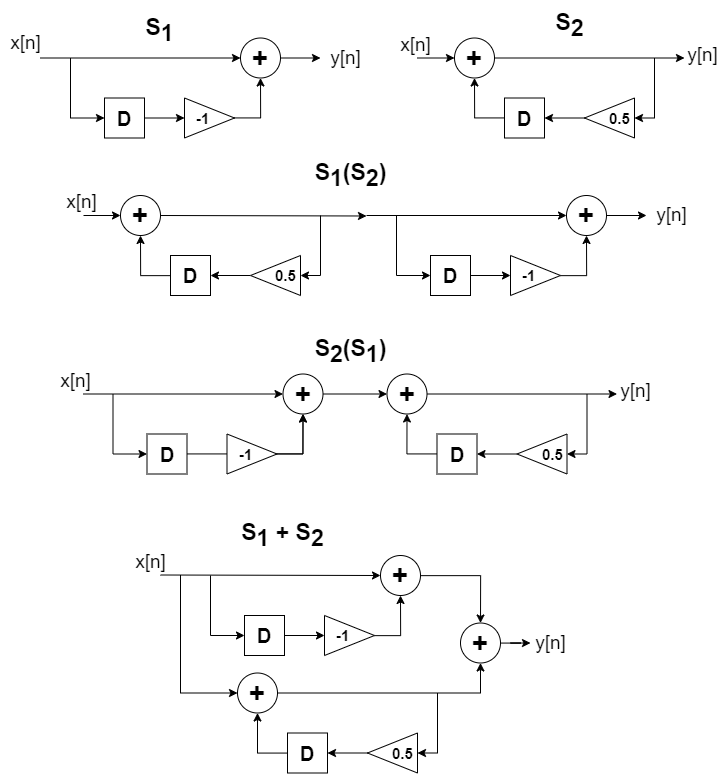

**ii. Write code to implement each of these two filters ($S_1, S_2$) in the following functions using the following syntax**
```python
def S1(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

and 
```python
def S2(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [ ]:
# write your code here
def S1(x):
  y = np.zeros(len(x))
  y[0] = 0

  for i in range(1, len(x)):
    y[i] = x[i] - x[i-1]

  return y

def S2(x):
  y = np.zeros(len(x))
  y[0] = 0

  for i in range(1, len(x)):
    y[i] = x[i] + 0.5 * y[i-1]

  return y

**iii. Write code to calculate the impulse response of each of the five systems, and plot the impulse response of each of these five systems:**

<ipython-input-93-97ab55a2dfb6>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[0].stem(n,ir_1)
<ipython-input-93-97ab55a2dfb6>:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(n,ir_2)
<ipython-input-93-97ab55a2dfb6>:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "u

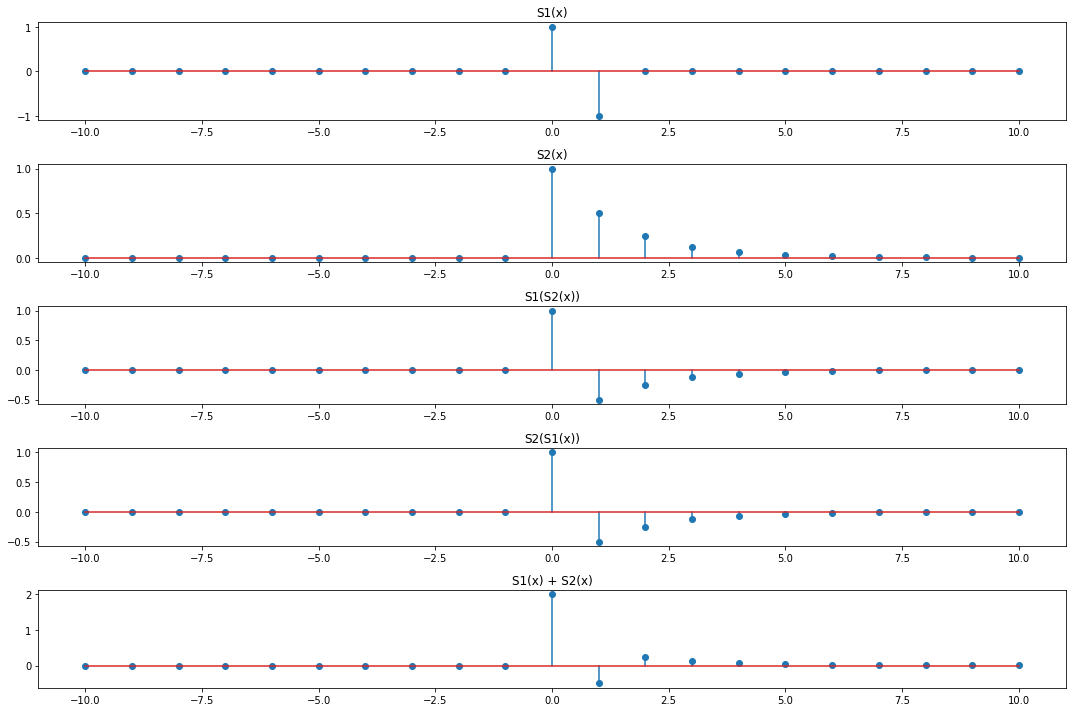

In [ ]:
# write your code here
n = np.arange(-10,10+1,1)
d = (n==0).astype(float)
ir_1 = S1(d)
ir_2 = S2(d)
ir_3 = S1(S2(d))
ir_4 = S2(S1(d))
ir_5 = S1(d) + S2(d)

fig, axs = plt.subplots(5,figsize=(15,10))
axs[0].stem(n,ir_1)
axs[0].set_title("S1(x)")
axs[1].stem(n,ir_2)
axs[1].set_title("S2(x)")
axs[2].stem(n,ir_3)
axs[2].set_title("S1(S2(x))")
axs[3].stem(n,ir_4)
axs[3].set_title("S2(S1(x))")
axs[4].stem(n,ir_5)
axs[4].set_title("S1(x) + S2(x)")

fig.tight_layout()

**2. Use the command ```audio, fs = sf.read("music.au")``` to load the file ```music.au``` into Python. The first variable ```audio``` is the signal, and the second variable ```fs``` is the sampling rate.**

In [ ]:
audio, fs = sf.read("music.au")

**3. Play the audio file using the command `ipd.Audio(audio, rate=fs)`.**

In [ ]:
# write your code here
ipd.Audio(audio, rate=fs)

**4. Next, filter the audio signal with each of the two systems $S_1$ and $S_2$ and listen to each of their outputs.**

In [ ]:
# write your code here
audio_S1 = S1(audio)
#ipd.Audio(audio_S1, rate=fs)
audio_S2 = S2(audio)
ipd.Audio(audio_S2, rate=fs)

**5. How do the filters change the sound of the audio signals? Explain your observations.**

S1 is sounds thinner with a lack of low frequency sounds and S2 sounds more muffled with a lack of high frequency sounds.

<h3 style="color:red;"><left>Exercise 4</left></h3>

**1. Consider the system $y=S_2[x]$ from Section 3. Find a difference equation for a new system $y=S_3[x]$ such that $\delta=S_3[S_2[\delta]]$ where $\delta$ denotes the discrete-time impulse function $\delta(n)$. Since both systems $S_2$ and $S_3$ are LTI, the time-invariance and superposition properties can be used to obtain $x=S_3[S_2[x]]$ for *any* discrete-time signal $x$. We say that the systems $S_3$ and $S_2$ are inverse filters because they cancel out the effects of each other.**

**Hint:** The system $y=S_3[x]$ can be described by the difference equation

\begin{equation}
    y[n]=ax[n]+bx[n-1]
\end{equation}

where $a$ and $b$ are constants.

write your answer here

**2. Complete the Python function using the following syntax.**
```python
def S3(x):
    """
    Parameters
    ---
    x: the discrete-time signal
    
    Returns:
    ---
    y: the filtered signal
    """
    pass
```

In [ ]:
# write your code here
def S3(x):
  y = np.zeros(len(x))
  y[0] = 0
  for i in range(1, len(y)):
    y[i] = x[i] - 0.5 * x[i-1]
  return y

**3. Write code to plot the impulse response of both $S_3$ and $S_3[S_2[\delta]]$ below.**

<ipython-input-118-b3acff63dd84>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[0].stem(n,ir_0)
<ipython-input-118-b3acff63dd84>:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(n,ir_1)


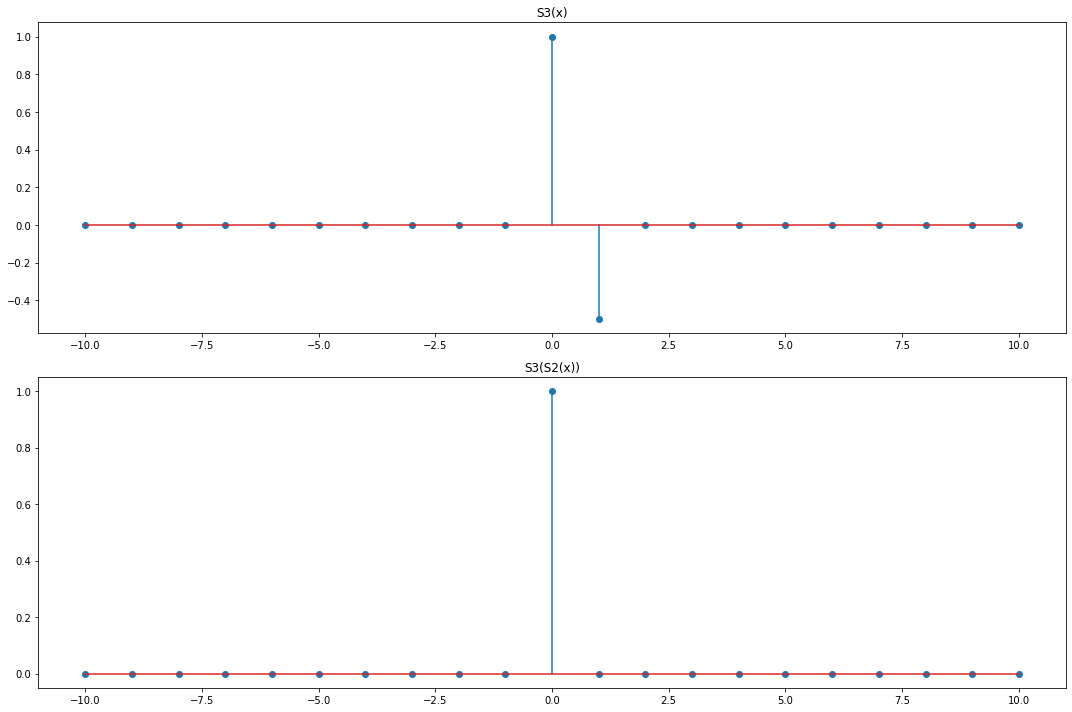

In [ ]:
# write your code here
n = np.arange(-10,10+1,1)
d = (n==0).astype(float)
ir_0 = S3(d)
ir_1 = S3(S2(d))

fig, axs = plt.subplots(2,figsize=(15,10))
axs[0].stem(n,ir_0)
axs[0].set_title("S3(x)")
axs[1].stem(n,ir_1)
axs[1].set_title("S3(S2(x))")

fig.tight_layout()

<h3 style="color:red;"><left>Exercise 5</left></h3>

Often it is necessary to determine if a system is linear and/or time-invariant. If the inner workings of a system are not known, this task is impossible because the linearity and time-invariance properties must hold true for all possible input signals. However, it is possible to show that a system is non-linear or time-varying because only a single instance must be found where the properties are violated.

The code in the cell below is the synatx for the three imported black boxes, ```bbox1```, ```bbox2``` and ```bbox3```. All of them have the same syntax
```python
def bboxN(x):
    return y
```
where ```x``` and ```y``` are the input and the output signals, and ```N=1,2,3```. **Exactly one of these systems is non-linear, and exactly one of them is time-varying.** Your task is to find the non-linear system and the time-varying system.

**Hints:** 
* You should try a variety of input signals until you find a counter-example.
* When testing for time-invariance, you need to look at the responses to a signal and to its delayed version. Since all your signals in Python have a finite duration, you should be very careful about shifting signals. In particular, if you want to shift a signal $x$ by $M$ samples to the left, $x$ should start with at least $M$ zeros. If you want to shift $x$ by $M$ samples to the right, $x$ should end with at least $M$ zeros.
* When testing for linearity, you may find that simple inputs such as the unit impulse do not accomplish the task. In this case, you should try something more complicated like a sinusoid or a random signal generated with the ```x = np.random.rand(N)``` command, where ```N``` here is the length of the signal.

**1. Import the three bbboxes from the file ```bboxes.py```.**

In [ ]:
# write your code here
from bboxes import bbox1, bbox2, bbox3

**2. Write code to plot input/output signal pairs that support your conclusions. Create multiple code cells if necessary.**

<ipython-input-139-bda4301dd078>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[0].stem(y1)
<ipython-input-139-bda4301dd078>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(y2)
<ipython-input-139-bda4301dd078>:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_li

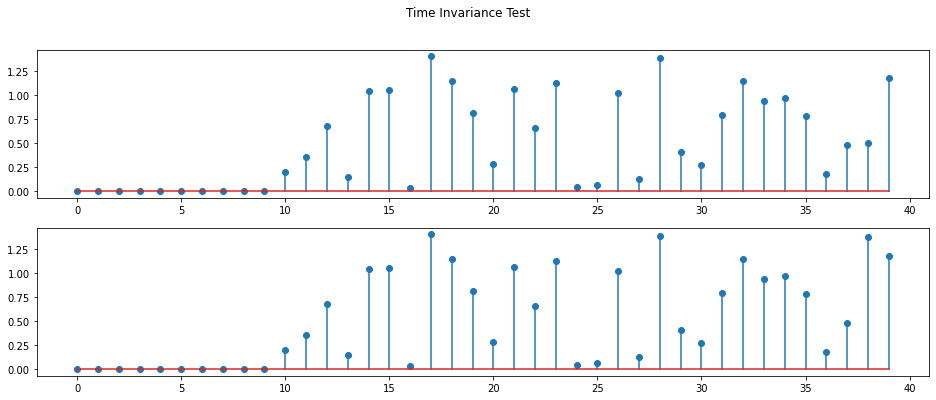

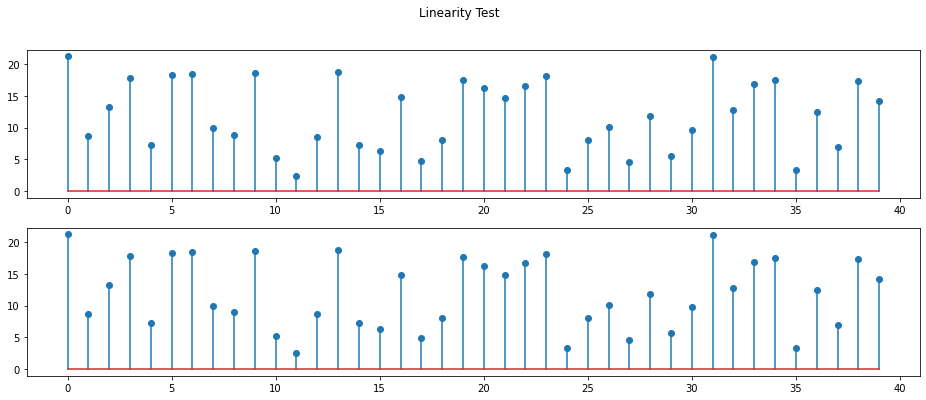

In [ ]:
# bbox1
x = np.random.rand(40)
x[0:5] = 0
x[35:40] = 0

x1 = x
y1_pre = bbox1(x1)
y1 = np.zeros(len(x1))
for i in range(5,len(y1)):
  y1[i] = y1_pre[i-5]

x2 = np.zeros(len(x))
for i in range(5,len(x2)):
  x2[i] = x[i-5]
y2 = bbox1(x2)

fig1, axs = plt.subplots(2)
axs[0].stem(y1)
axs[1].stem(y2)
fig1.suptitle("Time Invariance Test")
fig1.show()

x1 = np.random.rand(40)
x2 = np.random.rand(40)
a1 = 3
a2 = 13

y1 = a1 * bbox1(x1) + a2 * bbox1(x2)
y2 = bbox1(a1*x1 + a2*x2)

fig2, axs = plt.subplots(2)
axs[0].stem(y1)
axs[1].stem(y2)
fig2.suptitle("Linearity Test")
fig2.show()

<ipython-input-138-575255cba3e3>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[0].stem(y1)
<ipython-input-138-575255cba3e3>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(y2)
<ipython-input-138-575255cba3e3>:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_li

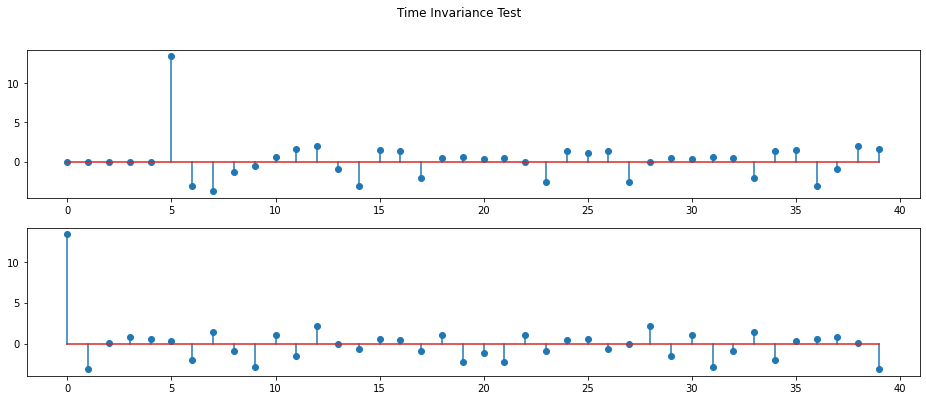

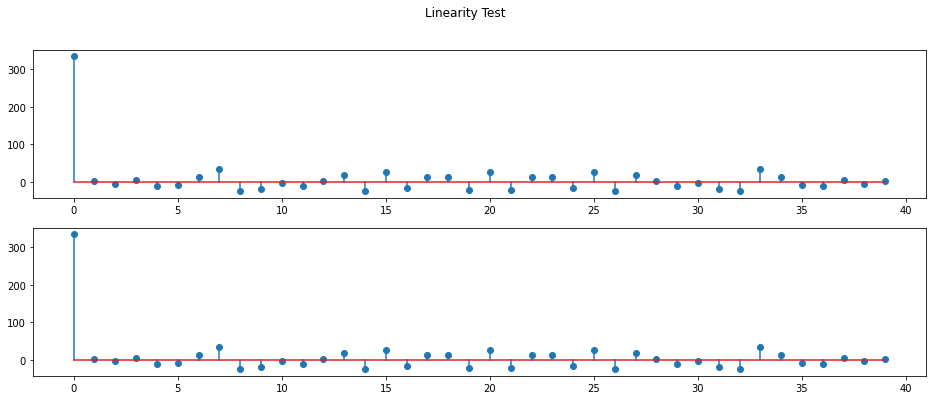

In [ ]:
# bbox2
x = np.random.rand(40)
x[0:5] = 0
x[35:40] = 0

x1 = x
y1_pre = bbox2(x1)
y1 = np.zeros(len(x1))
for i in range(5,len(y1)):
  y1[i] = y1_pre[i-5]

x2 = np.zeros(len(x))
for i in range(5,len(x2)):
  x2[i] = x[i-5]
y2 = bbox2(x2)

fig1, axs = plt.subplots(2)
axs[0].stem(y1)
axs[1].stem(y2)
fig1.suptitle("Time Invariance Test")
fig1.show()

x1 = np.random.rand(40)
x2 = np.random.rand(40)
a1 = 3
a2 = 13

y1 = a1 * bbox2(x1) + a2 * bbox2(x2)
y2 = bbox2(a1*x1 + a2*x2)

fig2, axs = plt.subplots(2)
axs[0].stem(y1)
axs[1].stem(y2)
fig2.suptitle("Linearity Test")
fig2.show()

<ipython-input-137-c6b7c4764f94>:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[0].stem(y1)
<ipython-input-137-c6b7c4764f94>:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  axs[1].stem(y2)
<ipython-input-137-c6b7c4764f94>:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_li

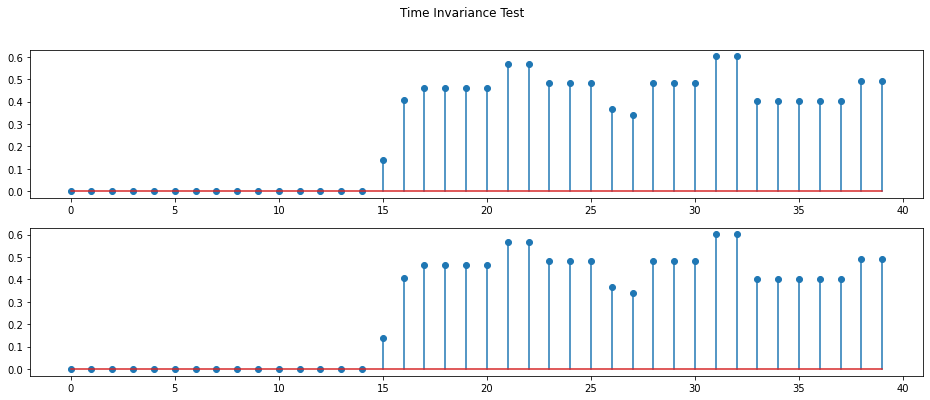

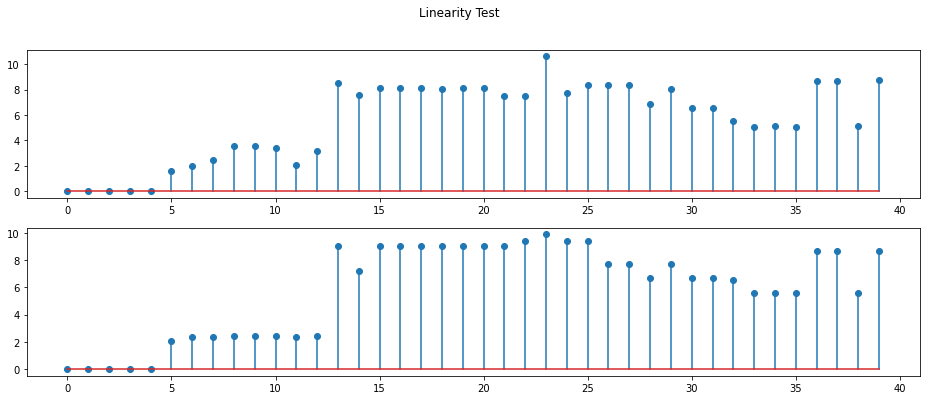

In [ ]:
# bbox3
x = np.random.rand(40)
x[0:5] = 0
x[35:40] = 0

x1 = x
y1_pre = bbox3(x1)
y1 = np.zeros(len(x1))
for i in range(5,len(y1)):
  y1[i] = y1_pre[i-5]

x2 = np.zeros(len(x))
for i in range(5,len(x2)):
  x2[i] = x[i-5]
y2 = bbox3(x2)

fig1, axs = plt.subplots(2)
axs[0].stem(y1)
axs[1].stem(y2)
fig1.suptitle("Time Invariance Test")
fig1.show()

x1 = np.random.rand(40)
x2 = np.random.rand(40)
a1 = 3
a2 = 13

y1 = a1 * bbox3(x1) + a2 * bbox3(x2)
y2 = bbox3(a1*x1 + a2*x2)

fig2, axs = plt.subplots(2)
axs[0].stem(y1)
axs[1].stem(y2)
fig2.suptitle("Linearity Test")
fig2.show()

**2. State which system is non-linear and which system is time-varying.**


write your answer here

**3. Explain how the plots support your conclusion.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.1</left></h3>

**For each of these three methods:**

**1. write a difference equation**

5)  $y[n] = 1/3 * (x[n] + x[n-1] + x[n-2])$<br>
6)  $y[n] = 0.6 * y[n-1] + 0.4 * x[n]$<br>
7)  $y[n] = y[n-1] + 1/3 * (x[n] - x[n-3])$

**2. Draw a system diagram**

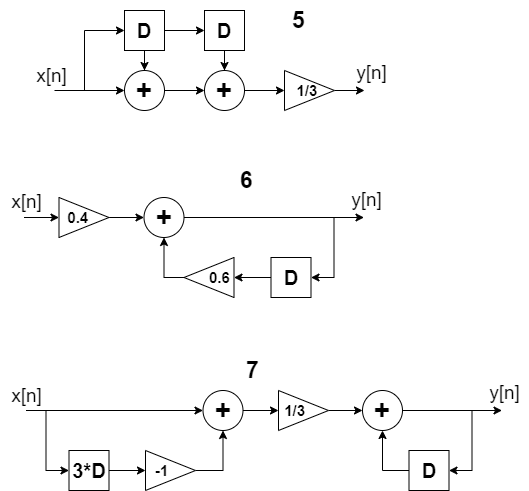

**3. Calculate the impulse response**

5)  $y[n] = 1/3 * (\delta[n] + \delta[n-1] + \delta[n-2])$<br>
6)  $y[n] = 0.6 * y[n-1] + 0.4 * \delta[n]$<br>
7)  $y[n] = y[n-1] + 1/3 * (\delta[n] - \delta[n-3])$



**4. Explain why methods (5) and (7) are known as moving average.**

write your answer here

<h3 style="color:red;"><left>Exercise 6.2</left></h3>

Load the file ```stockrates.npy``` into Python. This file contains a vector of daily stock market exchange rates for a publicly-traded stock.

Apply filters (6) and (7) to smooth the stock values. When you apply filter (6), you will need to initialize the value of *averagevalue(yesterday)*. Use an initial value of $0$. Similarly, in filter (7), set the initial values of the *value* vector to $0$ (for the days prior to the start of data collection).

**Note: You will need the following code to load data that is stored in a `.npy` file.**

In [ ]:
rate = np.load("stockrates.npy")

**1. Plot the original stock values.**

<ipython-input-105-e7944f81ca3c>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(rate)


<StemContainer object of 3 artists>

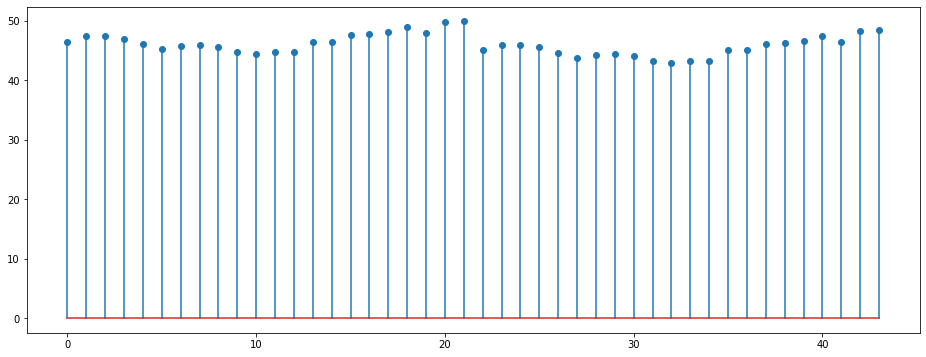

In [ ]:
# write your code here
plt.stem(rate)

**2. Plot the result of filtering with (6).**

<ipython-input-111-2627127aaf69>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(y6)


<StemContainer object of 3 artists>

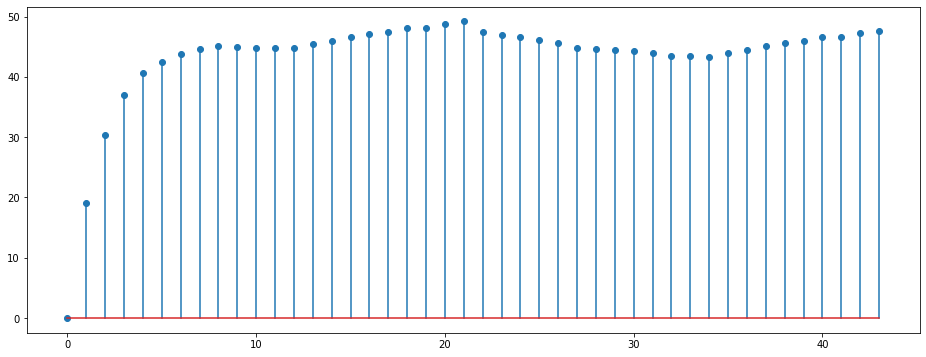

In [ ]:
# write your code here
y6 = np.zeros(len(rate))
y6[0] = 0

for i in range(1, len(y6)):
  y6[i] = 0.6 * y6[i-1] + 0.4 * rate[i]

plt.stem(y6)

**3. Plot the result of filtering with (7).**

<ipython-input-116-92ba84b21f46>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(y7)


<StemContainer object of 3 artists>

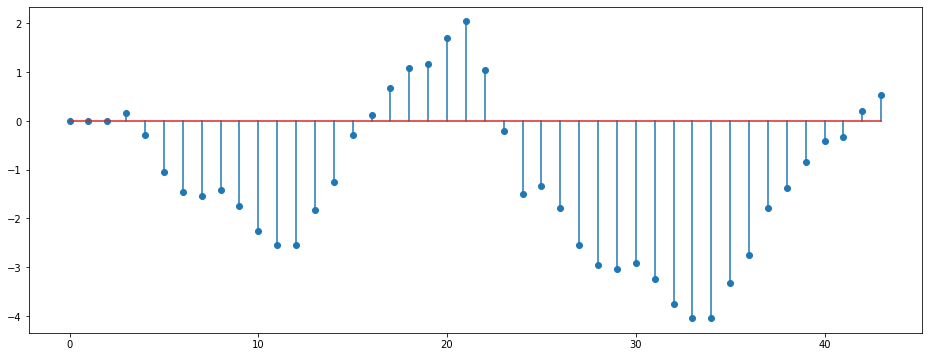

In [ ]:
# write your code here
y7 = np.zeros(len(rate))
y7[0:3] = 0

for i in range(3, len(y7)):
  y7[i] = y7[i-1] + (1.0/3) * (rate[i] - rate[i-3])

plt.stem(y7)

**4. Discuss the advantages and disadvantages of the two filters (6) and (7). Can you suggest a better method for initializing the filter outputs?**.

write your answer here